# **Import needed libraries**

In [9]:
# import system libs
import os
import itertools

# import data handling tools
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# **Loading the dataset**

> Read the training dataset into the dataframe

In [10]:
# Generate data paths with labels
train_data_dir = 'C:\\Users\\Chimni\\Desktop\\New folder\\DataSets\\Training'
filepaths = []
labels = []

# Get folders names
folds = os.listdir(train_data_dir)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

train_df = pd.concat([Fseries, Lseries], axis= 1)

In [11]:
train_df

,filepaths,labels
0,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,glioma
1,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,glioma
2,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,glioma
3,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,glioma
4,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,glioma
...,...,...
5707,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,pituitary
5708,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,pituitary
5709,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,pituitary
5710,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,pituitary


> read the testing dataset into the dataframe

In [12]:
# Generate data paths with labels
train_data_dir = 'C:\\Users\\Chimni\\Desktop\\New folder\\DataSets\\Training'
filepaths = []
labels = []

# Get folders names
folds = os.listdir(train_data_dir)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [13]:
ts_df

,filepaths,labels
0,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,glioma
1,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,glioma
2,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,glioma
3,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,glioma
4,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,glioma
...,...,...
5707,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,pituitary
5708,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,pituitary
5709,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,pituitary
5710,C:\Users\Chimni\Desktop\New folder\DataSets\Tr...,pituitary


# **Data preprocessing**

first we will check if the training data is balanced or not

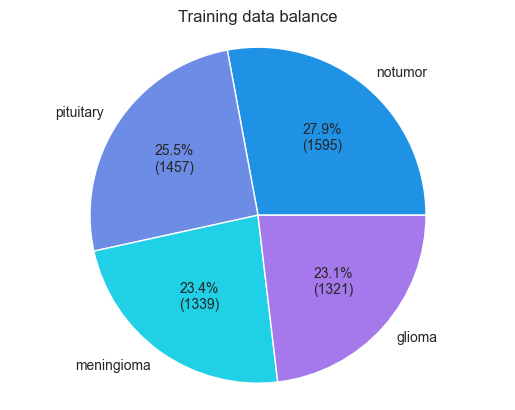

In [14]:
data_balance = train_df.labels.value_counts()


def custom_autopct(pct):
    total = sum(data_balance)
    val = int(round(pct*total/100.0))
    return "{:.1f}%\n({:d})".format(pct, val)


# pie chart for data balance
plt.pie(data_balance, labels = data_balance.index, autopct=custom_autopct, colors = ["#2092E6","#6D8CE6","#20D0E6","#A579EB"])
plt.title("Training data balance")
plt.axis("equal")
plt.show()

**data is balanced.**

**now we will split the testing data to test and validation data**

In [15]:
# valid and test dataframe
valid_df, test_df = train_test_split(ts_df,  train_size= 0.5, shuffle= True, random_state= 42)

**Create image data generator**

this step to convert these dataframes to numpy array

In [16]:
# crobed image size
batch_size = 16
img_size = (224, 224)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 2856 validated image filenames belonging to 4 classes.
Found 2856 validated image filenames belonging to 4 classes.


**Display sample from train data**

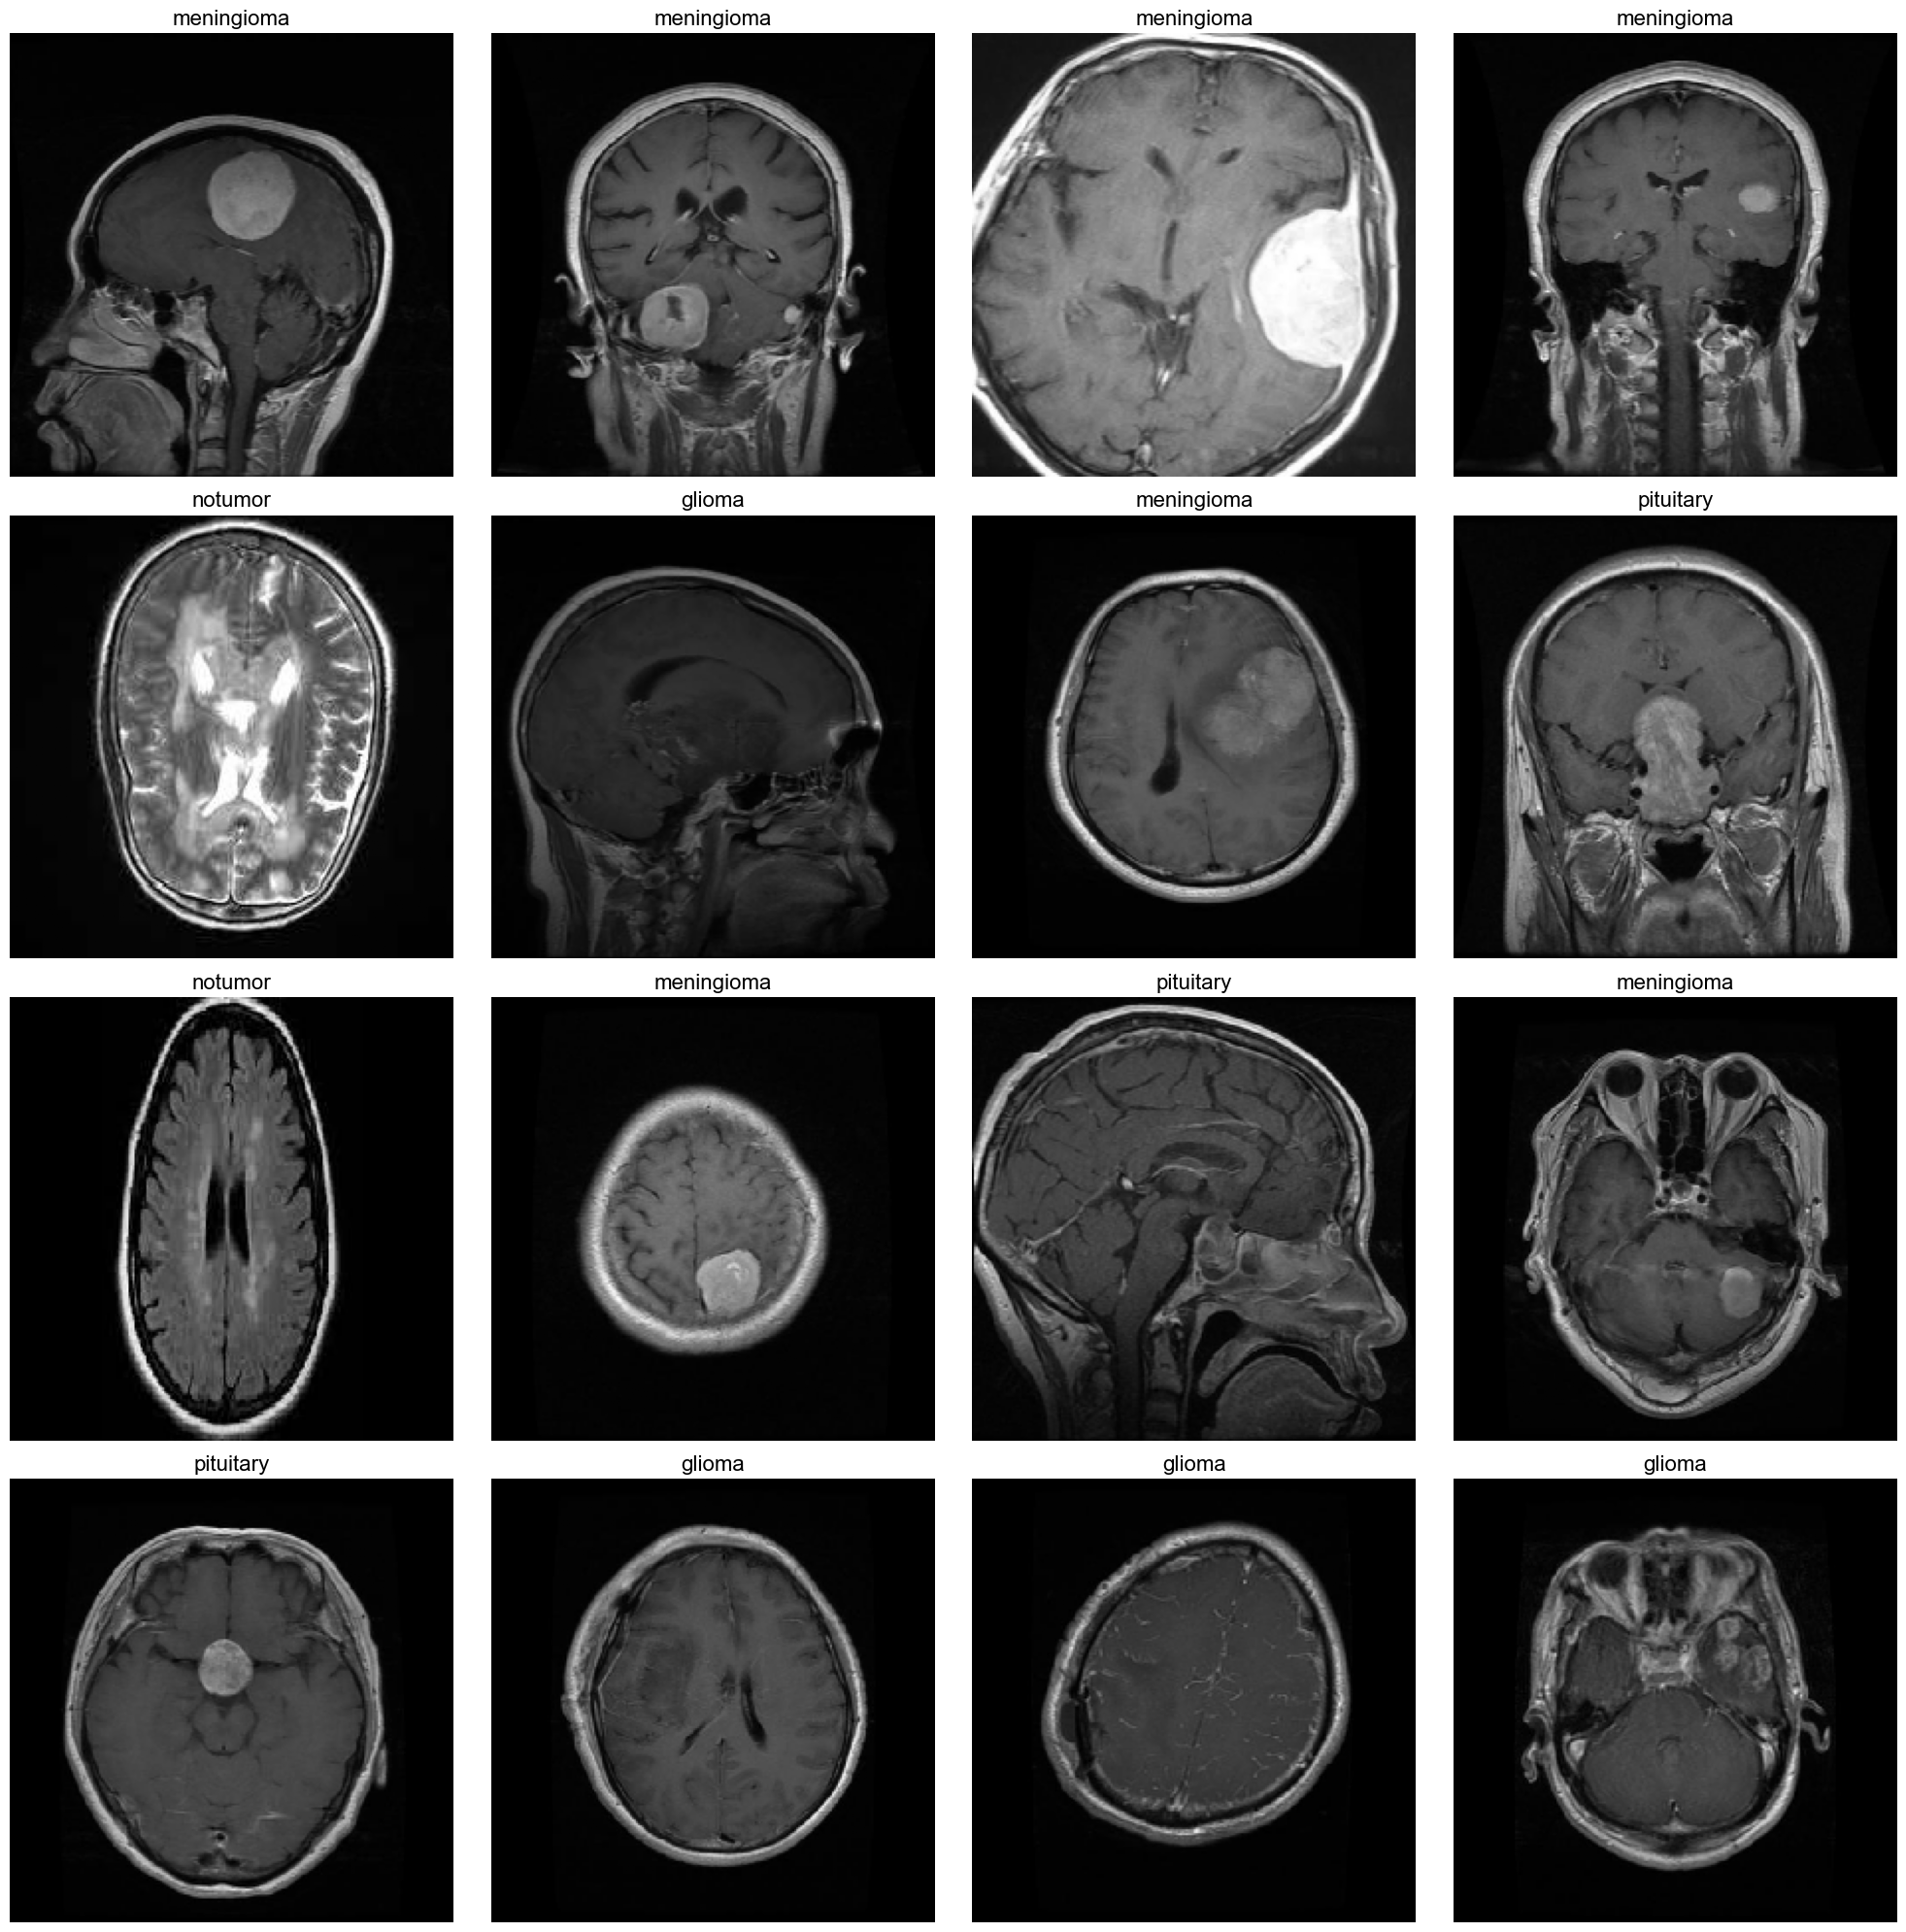

In [17]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'black', fontsize= 16)
    plt.axis('off')
plt.tight_layout()
plt.show()

# **Model Structure**

In [18]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape))
model.add(MaxPooling2D())
    
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D())
    
model.add(Flatten())
    
model.add(Dense(64,activation = "relu"))
model.add(Dense(32,activation = "relu"))
model.add(Dense(class_count, activation = "softmax"))


In [19]:
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    12,845,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,866,724 (49.08 MB)

 Trainable params: 12,866,724 (49.08 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
epochs = 10   # number of all epochs in training

history = model.fit(train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 116s 322ms/step - accuracy: 0.6627 - loss: 48.6100 - val_accuracy: 0.9541 - val_loss: 0.1795
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 80s 222ms/step - accuracy: 0.9596 - loss: 0.1530 - val_accuracy: 0.9881 - val_loss: 0.0655
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 104s 291ms/step - accuracy: 0.9910 - loss: 0.0583 - val_accuracy: 0.9975 - val_loss: 0.0259
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 131s 368ms/step - accuracy: 0.9972 - loss: 0.0187 - val_accuracy: 0.9993 - val_loss: 0.0077
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 89s 248ms/step - accuracy: 0.9996 - loss: 0.0065 - val_accuracy: 0.9996 - val_loss: 0.0028
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 156s 439ms/step - accuracy: 0.9997 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 173s 484ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 5.8139e-04
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 77s 216ms/step - accuracy: 1.0000

**Display model performance**

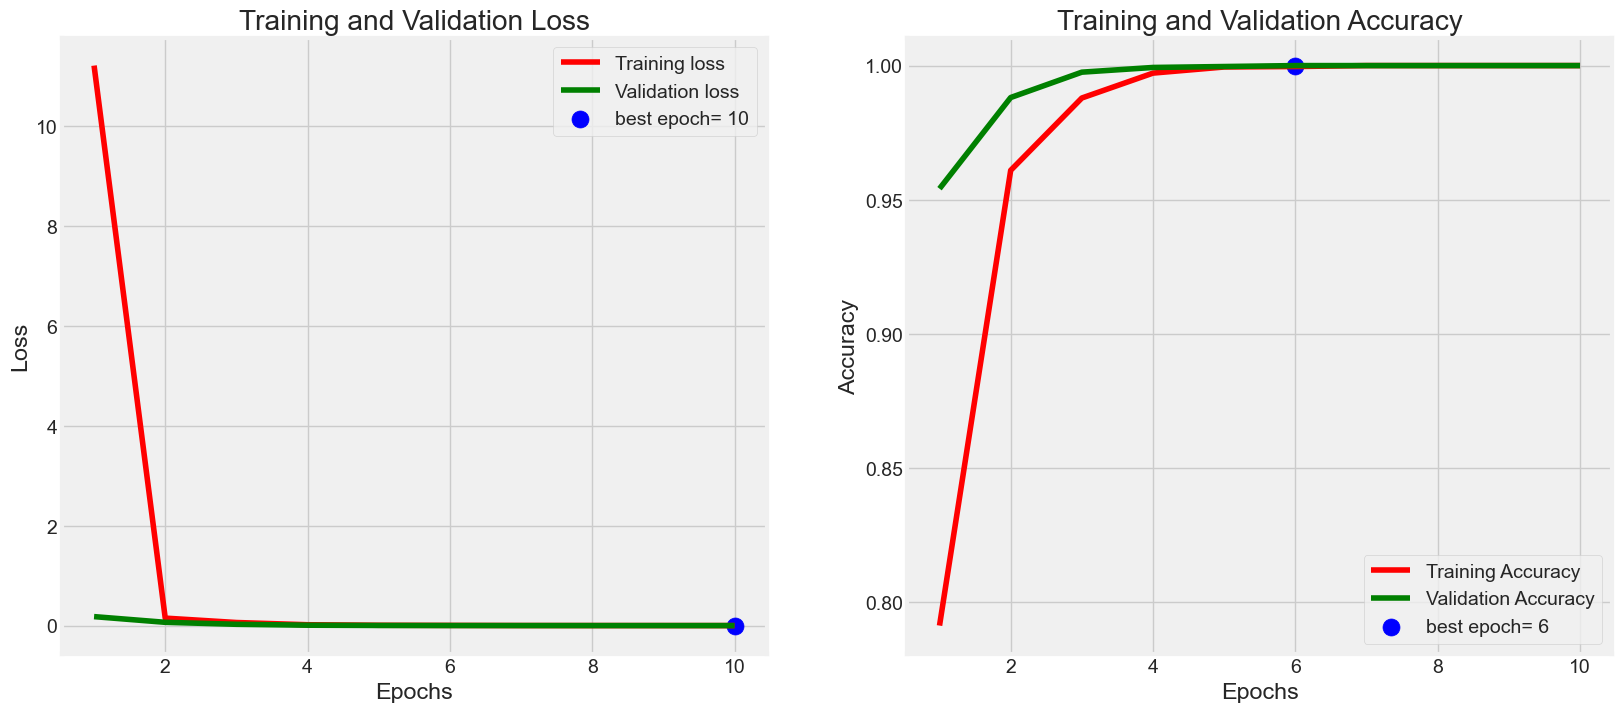

In [21]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# **Evaluate model**

In [22]:
train_score = model.evaluate(train_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

357/357 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - accuracy: 1.0000 - loss: 9.4611e-05
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 1.0000 - loss: 9.5132e-05
179/179 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 1.0000 - loss: 9.2027e-05
Train Loss:  9.287564898841083e-05
Train Accuracy:  1.0
--------------------
Validation Loss:  9.098072041524574e-05
Validation Accuracy:  1.0
--------------------
Test Loss:  9.477059211349115e-05
Test Accuracy:  1.0


# **Get Predictions**

In [23]:
preds = model.predict(test_gen)  
y_pred = np.argmax(preds, axis=1) 

179/179 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step


**Confusion Matrics and Classification Report**

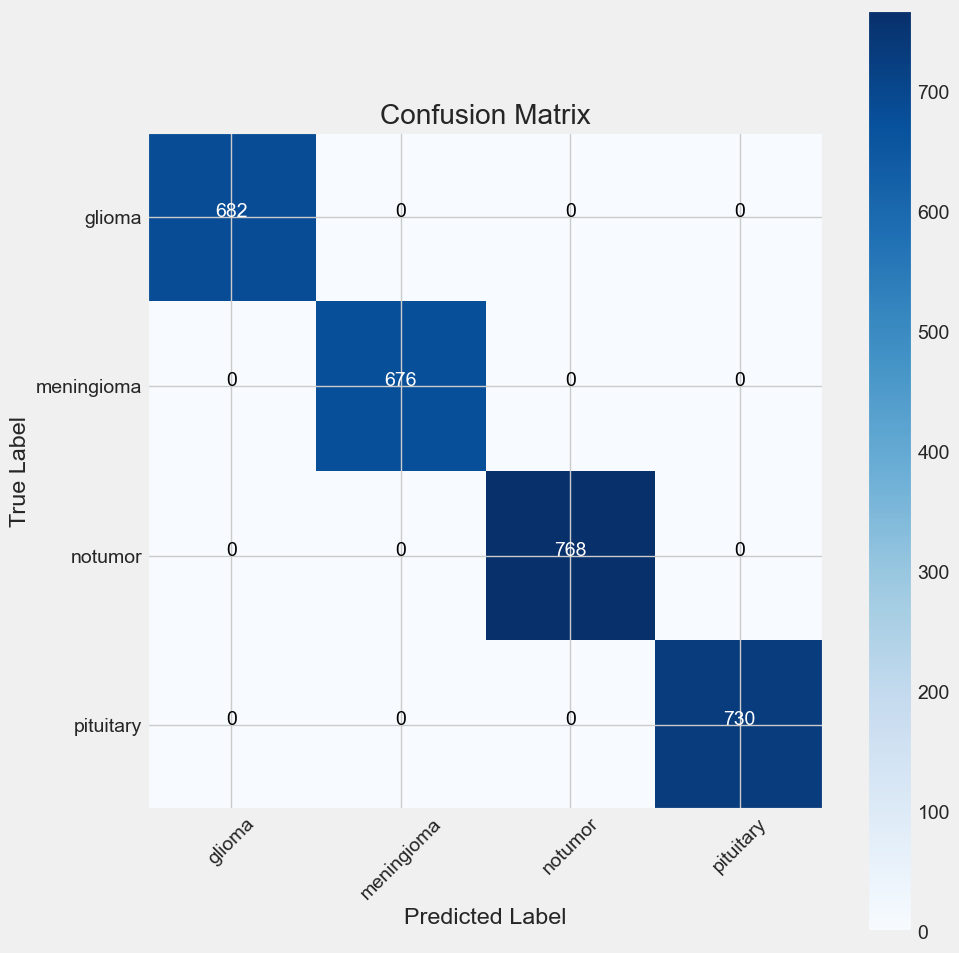

In [24]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
cm

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
    
    
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [25]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       1.00      1.00      1.00       682
  meningioma       1.00      1.00      1.00       676
     notumor       1.00      1.00      1.00       768
   pituitary       1.00      1.00      1.00       730

    accuracy                           1.00      2856
   macro avg       1.00      1.00      1.00      2856
weighted avg       1.00      1.00      1.00      2856



In [26]:
# Save the model to an HDF5 file
model.save(r'C:\Users\Chimni\Desktop\New folder\Notebooks\Models\Brain_Tumor.h5')
